In [1]:
import torch 
import torch.nn as nn
import numpy as np
from random import random
import matplotlib.pyplot as plt

from env import CartPoleEnv
from utils import *
from tqdm.notebook import tqdm

%load_ext autoreload
%autoreload 2

In [6]:
lr = 0.01
gamma = 1.0
num_episodes = 1000

policy = nn.Sequential(
    nn.Linear(4, 20),
    nn.LeakyReLU(),
    nn.Linear(20,2),
    nn.Softmax(dim=-1)
)
optimizer = torch.optim.Adam(policy.parameters(), lr=lr)

env = CartPoleEnv()
erm = EpisodeReplayMemory(gamma=gamma, lamda=1)
num_episodes = 4000

batch_size = 50
steps = []
losses = []
# TODO: Add to the below training loop to train your policy gradients algorithm!
for ep_num in tqdm(range(num_episodes)):
    num_steps = 0
    state, reward, done, _ = env.reset()

    states = []
    while not done:
        prev_state = state
        with torch.no_grad():
            probs = policy(torch.as_tensor(state, dtype=torch.float32))
            chosen_move = np.random.choice(range(0,2), p=probs.detach().numpy())
        state, reward, done, _ = env.step(chosen_move)
        num_steps += 1
        if done and len(erm) >= 499: reward = 30
        erm.append({'state': [state], 
                    'prev_state': [prev_state], 
                    'reward': reward,
                    'done': done,
                    'chosen_move': chosen_move,
                    'prob_left': probs[chosen_move]})
#     if len(erm) >= batch_size:
    episode_len = len(erm)
    sample = erm.sample_with_remove(episode_len)
    optimizer.zero_grad()
    probs = policy(sample['prev_state'])
    moves = sample['chosen_move']
#     normalized_rewards = sample['discounted_rewards'] - sample['discounted_rewards'].mean()
    loss = -(torch.log(probs[range(episode_len),moves.long()])*sample['discounted_rewards']).sum()/episode_len
    loss.backward()
    losses.append(loss.item())
    optimizer.step()
        
#     print("Ep:", ep_num, "Steps:", num_steps)
    steps.append(num_steps)

  0%|          | 0/4000 [00:00<?, ?it/s]

KeyboardInterrupt: 

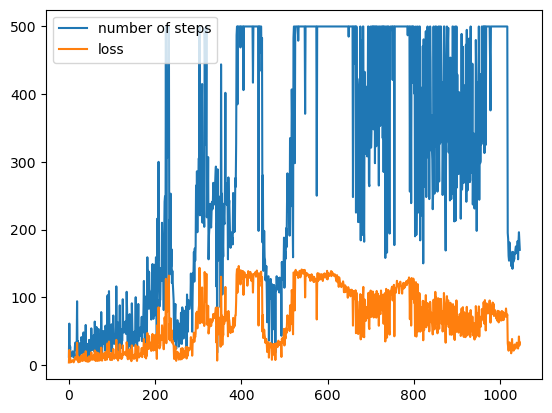

In [7]:
plt.plot(steps)
plt.plot(losses)
plt.legend(['number of steps', 'loss'])

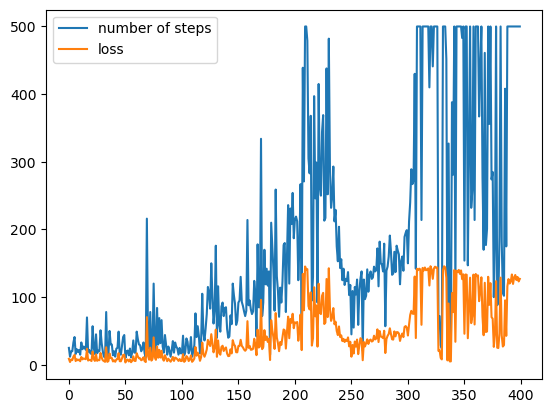

In [80]:
plt.plot(steps)
plt.plot(losses)
plt.legend(['number of steps', 'loss'])

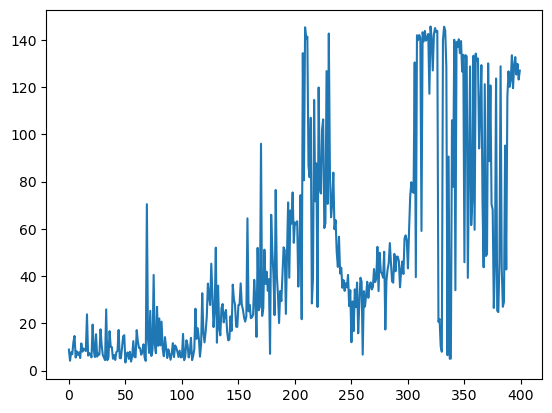

In [79]:
plt.plot(losses)

In [128]:
probs[:,0]*sample['discounted_rewards']

tensor([[1.1750, 3.1248, 2.4762, 3.0020, 3.2672, 1.4982, 0.8296, 2.8342, 3.3889,
         0.4388, 2.2903, 2.6757, 2.0367, 1.7796]], grad_fn=<MulBackward0>)

tensor([0.4336, 0.4355, 0.4348, 0.4375, 0.4381, 0.4357, 0.4366, 0.4351, 0.4394,
        0.4388, 0.4390, 0.4368, 0.4347, 0.4346], grad_fn=<SelectBackward0>)

In [120]:
sample['discounted_rewards']

tensor([[8.4991, 9.2821, 4.6856, 6.1258, 8.7842, 6.8619, 2.7100, 3.4390, 8.3323,
         7.9411, 9.0152, 8.9058, 9.2023, 5.2170, 6.5132, 7.1757, 9.1137, 1.9000,
         9.3539, 5.6953, 7.4581, 4.0951, 8.6491, 7.7123, 1.0000, 8.1470]])

In [118]:
sample['prev_state']

tensor([[-3.8422e-02,  2.0624e-01, -9.5905e-05, -2.6020e-01],
        [-5.9571e-02, -5.3978e-01,  7.6821e-02,  9.6573e-01],
        [-4.3927e-02, -4.6743e-02,  2.1047e-03,  1.5641e-02],
        [ 8.6927e-02,  1.1303e+00, -1.2291e-01, -1.7989e+00],
        [-1.2629e-01, -1.3248e+00,  1.9243e-01,  2.2669e+00],
        [-4.1895e-02,  3.4344e-01, -3.1100e-03, -5.6830e-01],
        [-2.4255e-02,  7.3392e-01, -3.1715e-02, -1.1592e+00],
        [ 1.3606e-01,  1.1333e+00, -2.0143e-01, -1.8874e+00],
        [-3.2143e-02, -5.3718e-01,  2.6310e-02,  9.0628e-01],
        [-2.4478e-02, -1.2608e-02, -2.5137e-03, -2.1331e-02],
        [ 7.6995e-02,  1.1877e+00, -1.6989e-01, -1.8745e+00],
        [-4.1392e-02,  2.0783e-01, -1.2398e-03, -2.9533e-01],
        [-5.5210e-02,  1.2361e-02,  2.1547e-02,  5.0828e-03],
        [-5.0820e-02,  1.1743e-02,  1.6034e-02,  1.8707e-02],
        [-2.7879e-02, -1.2492e-02,  4.2679e-03, -2.3873e-02],
        [-2.7413e-02, -1.1845e-02, -9.6238e-03, -3.8157e-02],
        

In [113]:
sample = erm.sample(100)

In [114]:
sample['discounted_rewards']

tensor([[11.,  5.,  9.,  3.,  1.,  7.,  5.,  1.,  9., 29.,  2., 23., 16., 14.,
         31., 17., 32., 32., 12., 27.,  6.,  3., 20.,  8.,  9.,  6., 11., 19.,
         18., 11.,  7.,  8., 22., 18., 14., 17., 10., 16., 16., 28., 15.,  3.,
         23., 17., 33., 26., 10., 28., 25., 21., 13.,  3.,  7., 26.,  2., 13.,
         14., 10., 24.,  3., 30., 20., 19.,  2., 13.,  4., 11.,  7.,  5., 18.,
         24., 22.,  4.,  9.,  4., 29., 12.,  7., 10.,  4.,  8., 12.,  6.,  8.,
          2., 15.,  5.,  6., 14.,  2.,  1.,  4.,  1., 25., 15., 12.,  9., 27.,
         13., 15.]])